In [1]:
import pandas as pd
import numpy as np
import requests 
import re
import pylab
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from IPython.display import Image

# Data Gathering

### Twitter Archive

In [2]:
archive_df= pd.read_csv('twitter-archive-enhanced.csv')


### Image Predictions

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

filename = 'image-predictions.csv'
response = requests.get(url)
with open(filename, 'wb') as f:
    f.write(response.content)

In [4]:
image_predictions_df = pd.read_csv('image-predictions.csv', sep='\t')

### Additional Data (Twitter API)

In [5]:
api_df = pd.read_json('tweet-json.txt', lines = True)

# Data Assessing


## visual assesment

In [6]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
api_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## programmatic assessement

In [9]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [10]:
api_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [11]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [12]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
api_df.info()
['possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

['possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status']

In [14]:
api_df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [15]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
archive_df.shape

(2356, 17)

In [17]:
api_df.shape

(2354, 31)

In [18]:
image_predictions_df.shape

(2075, 12)

In [19]:
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Lolo         1
Mutt         1
Horace       1
Laika        1
Ike          1
Name: name, Length: 957, dtype: int64

In [24]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
print(archive_df.loc[archive_df.rating_numerator ==1776, 'text'])
print(archive_df.loc[archive_df.rating_numerator ==666, 'text'])
print(archive_df.loc[archive_df.rating_numerator ==99, 'text'])

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
1228    Happy Saturday here's 9 puppers on a bench. 99...
Name: text, dtype: object


In [26]:
#high rate dog
print(archive_df['text'][979]) 
#no picture, will be dropped later
print(archive_df['text'][189]) 
#9 dogs
print(archive_df['text'][1228]) 

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1


In [27]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
print(archive_df.loc[archive_df.rating_denominator == 15, 'text']) 
print(archive_df.loc[archive_df.rating_denominator == 2, 'text']) 
print(archive_df.loc[archive_df.rating_denominator == 11, 'text']) 

342    @docmisterio account started on 11/15/15
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object


In [29]:
#tweet to explain rating
print(archive_df['text'][342]) 
#actual rating 9/10 need to change manually
print(archive_df['text'][2335]) 
#actual rating 14/10 need to be changed manually
print(archive_df['text'][784]) 
#retweet - it will be deleted when delete all retweets
print(archive_df['text'][1068]) 
#actual rating 10/10 need to be changed manually
print(archive_df['text'][1662]) 

@docmisterio account started on 11/15/15
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


In [30]:
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [32]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [33]:
image_predictions_df.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1453,776819012571455488,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True


In [34]:
# This is an image for tweet_id 856282028240666624
Image(url = 'https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg')

In [35]:
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [36]:
image_predictions_df['p1'].value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
African_hunting_dog      1
clog                     1
African_grey             1
mortarboard              1
bookshop                 1
Name: p1, Length: 378, dtype: int64

In [37]:
image_predictions_df['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
polecat                 1
rifle                   1
toucan                  1
menu                    1
hotdog                  1
Name: p2, Length: 405, dtype: int64

In [38]:
image_predictions_df['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
marmot                 1
coffeepot              1
parachute              1
viaduct                1
eel                    1
Name: p3, Length: 408, dtype: int64

## Clean

In [39]:
new_api_df= api_df.copy()


##  Quality Issues
### api_df

- Contributors, coordinates, geo have no data at all, so we don't consider these fields.<br>
- extended_entities Without the data of this field, we can determine that the tweet does not have a picture.<br>
- in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str are the same group. <br>
- maybe_sensitive, possible_sensitive_appealable these fields have little to do with the theme.<br>
- place displays tweet location information, So this field is not retained.<br>
- quoted_status, quoted_status_id, quoted_status_id_str, quoted_status_permalink are the same group. When the message is a quoted tweet, these fields will record the relevant information, so they will be dropped.<br>
- \\retweeted_status: Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. So as long as it is forwarded data, we don't want it.<br>
- display_text_range indicates the range of text(DROP).<br>
- entities related information about the original tweets, because there is image prediction to find related image predictions, so this field is not used.<br>

- id_str type error, should be string object<br>
- is_quote_status: Indicates whether this is a Quoted Tweet. So as long as it is True we don't want
- lang type error, should be category datatype<br>
- source mixed html tag<br>
- retweeted are False, don't use this field<br>
- truncated are False, don't use this field<br>
- user is the same account @WeRateDogs, this field can also be removed<br>

## Tidiness issues
- merging three data sets in one<br>
- creating one column for dog stage<br>
- Standardize dog ratings as floats.<br>

- ### define

Remove unwanted fields, contributors, coordinates, geo, possibly_sensitive, possible_sensitive_appealable, place, display_text_range, entities, favorited, retweeted, truncated, user



- ### Code

In [40]:
columns=['contributors', 'coordinates', 'geo', 'possibly_sensitive', 'possibly_sensitive_appealable', 'place', 'display_text_range', 'entities', 'favorited', 'retweeted', 'truncated', 'user']
new_api_df.drop(columns, axis=1, inplace=True)

- ### Test

In [41]:
new_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 2354 non-null   datetime64[ns, UTC]
 1   id                         2354 non-null   int64              
 2   id_str                     2354 non-null   int64              
 3   full_text                  2354 non-null   object             
 4   extended_entities          2073 non-null   object             
 5   source                     2354 non-null   object             
 6   in_reply_to_status_id      78 non-null     float64            
 7   in_reply_to_status_id_str  78 non-null     float64            
 8   in_reply_to_user_id        78 non-null     float64            
 9   in_reply_to_user_id_str    78 non-null     float64            
 10  in_reply_to_screen_name    78 non-null     object             
 11  is_q

- ### define
 Remove extended_entities NULL values

- ### Code

In [42]:
new_api_df = new_api_df[new_api_df.extended_entities.notnull()]
new_api_df

,created_at,id,id_str,full_text,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,is_quote_status,retweet_count,favorite_count,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,"{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,8853,39467,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,"{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,6514,33819,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,4328,25461,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,"{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,8964,42908,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,"{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,9774,41048,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,"{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,41,111,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,"{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,147,311,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,"{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,47,128,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,"{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,48,132,en,NaN,NaN,NaN,NaN


- ### Test

In [43]:
sum(new_api_df.extended_entities.isnull())


0

- ### define
Delete in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str 

Since these fields are information of the same group and in_reply_to_status_id with no data values.

In [44]:
new_api_df = new_api_df[new_api_df.in_reply_to_status_id.isnull()]     

In [45]:
print(new_api_df.in_reply_to_status_id.count(), 
      new_api_df.in_reply_to_user_id.count(),
      new_api_df.in_reply_to_screen_name.count(),
      new_api_df.in_reply_to_user_id.count(),
      new_api_df.in_reply_to_user_id_str.count())

0 0 0 0 0


- ### define
Delete data with is_quote_status to True<br>
Leave is_quote_status records as False.

- ### code

In [46]:
new_api_df = new_api_df[~new_api_df.is_quote_status]
new_api_df

,created_at,id,id_str,full_text,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,is_quote_status,retweet_count,favorite_count,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,"{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,8853,39467,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,"{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,6514,33819,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,4328,25461,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,"{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,8964,42908,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,"{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,9774,41048,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,"{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,41,111,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,"{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,147,311,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,"{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,47,128,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,"{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,48,132,en,NaN,NaN,NaN,NaN


- ### Test


In [47]:
sum(new_api_df.is_quote_status)

0

- ### define
Delete retweeded_status with valued data
Leave the retweeted_status method isnull() to True for data

- ### Code

In [48]:
new_api_df = new_api_df[new_api_df.retweeted_status.isnull()]
new_api_df

,created_at,id,id_str,full_text,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,is_quote_status,retweet_count,favorite_count,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,"{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,8853,39467,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,"{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,6514,33819,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,4328,25461,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,"{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,8964,42908,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,"{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,9774,41048,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,"{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,41,111,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,"{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,147,311,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,"{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,47,128,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,"{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,False,48,132,en,NaN,NaN,NaN,NaN


- ### Test

In [49]:
sum(new_api_df.retweeted_status.notnull())

0

- ### Define
Check the rest of the data and remove the fields without data.

In [50]:
new_api_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 1971 non-null   datetime64[ns, UTC]
 1   id                         1971 non-null   int64              
 2   id_str                     1971 non-null   int64              
 3   full_text                  1971 non-null   object             
 4   extended_entities          1971 non-null   object             
 5   source                     1971 non-null   object             
 6   in_reply_to_status_id      0 non-null      float64            
 7   in_reply_to_status_id_str  0 non-null      float64            
 8   in_reply_to_user_id        0 non-null      float64            
 9   in_reply_to_user_id_str    0 non-null      float64            
 10  in_reply_to_screen_name    0 non-null      object             
 11  is_q

- ### Code

In [51]:
columns=['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status']
new_api_df= new_api_df.drop(columns, axis=1)

- ### Test

In [52]:
new_api_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   created_at         1971 non-null   datetime64[ns, UTC]
 1   id                 1971 non-null   int64              
 2   id_str             1971 non-null   int64              
 3   full_text          1971 non-null   object             
 4   extended_entities  1971 non-null   object             
 5   source             1971 non-null   object             
 6   is_quote_status    1971 non-null   bool               
 7   retweet_count      1971 non-null   int64              
 8   favorite_count     1971 non-null   int64              
 9   lang               1971 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 155.9+ KB


- ### Define
Remove the is_quote_status, extended_entities field
- ### Code

In [53]:
new_api_df.drop(['is_quote_status', 'extended_entities'], axis=1, inplace=True)

- ### Test

In [54]:
new_api_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      1971 non-null   datetime64[ns, UTC]
 1   id              1971 non-null   int64              
 2   id_str          1971 non-null   int64              
 3   full_text       1971 non-null   object             
 4   source          1971 non-null   object             
 5   retweet_count   1971 non-null   int64              
 6   favorite_count  1971 non-null   int64              
 7   lang            1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 138.6+ KB


- ### Define

Correct id_str type is str datatype
- ### Code

In [55]:
new_api_df.id_str = new_api_df.id_str.astype('str')

- ### Test

In [56]:
new_api_df.id_str.dtype

dtype('O')

- ### Define
Correct lang type is category datatype
- ### Code

In [57]:
new_api_df.lang = new_api_df.lang.astype('category')

- ### Test

In [58]:
new_api_df.lang.dtype

CategoricalDtype(categories=['en', 'et', 'eu', 'in', 'nl'], ordered=False)

- ### Define

Trimming source content
- ### Code

In [59]:
new_api_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [60]:
replace = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'iPhone',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Web Client',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck',
}
new_api_df.source.replace(replace, inplace=True)

- ### Test

In [61]:
new_api_df.source.unique()

array(['iPhone', 'Web Client', 'TweetDeck'], dtype=object)

In [62]:
new_api_df.head()

,created_at,id,id_str,full_text,source,retweet_count,favorite_count,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,iPhone,8853,39467,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,iPhone,6514,33819,en
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,iPhone,4328,25461,en
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,iPhone,8964,42908,en
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,iPhone,9774,41048,en


- ### Define
Merge the clean versions of  archive_df, image_predictions_df, and new_api_df dataframes.
- ### Code

In [63]:
# Make a copy of the tables before merging and cleaning
archive_clean_df = archive_df.copy()
image_predictions_clean_df = image_predictions_df.copy()
api_clean_df = new_api_df.copy()


In [64]:
dfs = pd.concat([archive_clean_df, image_predictions_clean_df, api_clean_df], join='outer', axis=1)

In [65]:
dfs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3_conf,p3_dog,created_at,id,id_str,full_text,source,retweet_count,favorite_count,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.061428,True,2017-08-01 16:23:56+00:00,8.924206e+17,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,iPhone,8853.0,39467.0,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.072010,True,2017-08-01 00:17:27+00:00,8.921774e+17,892177421306343424,This is Tilly. She's just checking pup on you....,iPhone,6514.0,33819.0,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.116197,True,2017-07-31 00:18:03+00:00,8.918152e+17,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,iPhone,4328.0,25461.0,en
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.222752,True,2017-07-30 15:58:51+00:00,8.916896e+17,891689557279858688,This is Darla. She commenced a snooze mid meal...,iPhone,8964.0,42908.0,en
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.154629,True,2017-07-29 16:00:24+00:00,8.913276e+17,891327558926688256,This is Franklin. He would like you to stop ca...,iPhone,9774.0,41048.0,en


- ### Test

In [66]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   object             
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

- ### Define
Create one column for the various dog types: doggo, floofer, pupper, pupp
- ### Code 

In [67]:
# Extract the text from the columns into the new dog_type columnn
# handle none
dfs.doggo.replace('None', '', inplace=True)
dfs.floofer.replace('None', '', inplace=True)
dfs.pupper.replace('None', '', inplace=True)
dfs.puppo.replace('None', '', inplace=True)

# merge into column
dfs['dog_stage'] = dfs.doggo + dfs.floofer + dfs.pupper + dfs.puppo

# handle multiple stages
dfs.loc[dfs.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
dfs.loc[dfs.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
dfs.loc[dfs.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
dfs.loc[dfs.dog_stage == '', 'dog_stage'] = np.nan

C:\Users\FreeComp\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


- ### Test

In [68]:
dfs[['dog_stage', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,dog_stage,doggo,floofer,pupper,puppo
1914,NoneNoneNoneNone,None,None,None,None
1262,NoneNoneNoneNone,None,None,None,None
402,NoneNonepupperNone,None,None,pupper,None
1305,NoneNoneNoneNone,None,None,None,None
1554,NoneNoneNoneNone,None,None,None,None
1825,NoneNonepupperNone,None,None,pupper,None
1595,NoneNoneNoneNone,None,None,None,None
554,NoneNoneNonepuppo,None,None,None,puppo
625,NoneNoneNoneNone,None,None,None,None
2138,NoneNoneNoneNone,None,None,None,None


In [69]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   object             
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [70]:
dfs.dog_stage.value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stage, dtype: int64

- ### Define
Delete retweets
- ### Code

In [71]:
dfs = dfs[np.isnan(dfs.retweeted_status_id)]

- ### Test

In [72]:
#Verify no non-null entires are left
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   object             
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

- ### Define
Remove columns no longer needed and duplicated columns.
- ### Code

In [73]:
dfs = dfs.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'img_num', 'source', 'lang','created_at'], axis=1)

In [74]:
dfs = dfs.loc[:,~dfs.columns.duplicated()]

- ### Test

In [75]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   expanded_urls       2117 non-null   object 
 4   rating_numerator    2175 non-null   int64  
 5   rating_denominator  2175 non-null   int64  
 6   name                2175 non-null   object 
 7   doggo               2175 non-null   object 
 8   floofer             2175 non-null   object 
 9   pupper              2175 non-null   object 
 10  puppo               2175 non-null   object 
 11  jpg_url             1896 non-null   object 
 12  p1                  1896 non-null   object 
 13  p1_conf             1896 non-null   float64
 14  p1_dog              1896 non-null   object 
 15  p2                  1896 non-null   object 
 16  p2_con

- ### Define
Change the timestamp to correct datetime format
- ### Code

In [76]:
#Remove the time zone from the 'timestamp' column
dfs['timestamp'] = dfs['timestamp'].str.slice(start=0, stop=-6)
# Change the 'timestamp' column to a datetime object
dfs['timestamp'] = pd.to_datetime(dfs['timestamp'], format = "%Y-%m-%d %H:%M:%S")

- ### Test

In [77]:
dfs.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2_dog,p3,p3_conf,p3_dog,id,id_str,full_text,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,True,Shetland_sheepdog,0.061428,True,8.924206e+17,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,8853.0,39467.0,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,892177421306343424,This is Tilly. She's just checking pup on you....,6514.0,33819.0,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,True,bloodhound,0.116197,True,8.918152e+17,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4328.0,25461.0,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,True,miniature_pinscher,0.222752,True,8.916896e+17,891689557279858688,This is Darla. She commenced a snooze mid meal...,8964.0,42908.0,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,True,Doberman,0.154629,True,8.913276e+17,891327558926688256,This is Franklin. He would like you to stop ca...,9774.0,41048.0,NoneNoneNoneNone


- ### Define
Correct naming issues
- ### Code

In [78]:
dfs.name = dfs.name.str.replace('^[a-z]+', 'None')

- ### Test

In [79]:
dfs['name'].value_counts()

None         784
Lucy          11
Charlie       11
Oliver        10
Cooper        10
            ... 
Bilbo          1
Shnuggles      1
Sunshine       1
Jarvis         1
Ike            1
Name: name, Length: 931, dtype: int64

- ### Define
Standardize dog ratings
- ### Code

In [80]:
dfs['rating_numerator'] = dfs['rating_numerator'].astype(float)
dfs['rating_denominator'] = dfs['rating_denominator'].astype(float)

- ### Test

In [81]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   expanded_urls       2117 non-null   object        
 4   rating_numerator    2175 non-null   float64       
 5   rating_denominator  2175 non-null   float64       
 6   name                2175 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
 11  jpg_url             1896 non-null   object        
 12  p1                  1896 non-null   object        
 13  p1_conf             1896 non-null   float64     

In [82]:
# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating
decimals_text = []
decimals_index = []
decimals = []
for x, text in dfs['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        decimals_text.append(text)
        decimals_index.append(x)
        decimals.append(re.search('\d+\.\d+', text).group())

In [83]:
# Print ratings with decimals        
decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [84]:
# Print the indices of the ratings above (have decimal)
decimals_index

[45, 695, 763, 1689, 1712]

In [85]:
decimals

['13.5', '9.75', '11.27', '9.5', '11.26']

In [86]:
#Correctly converting the above decimal ratings to float
dfs.loc[decimals_index[0],'rating_numerator'] = float(decimals[0])
dfs.loc[decimals_index[1],'rating_numerator'] = float(decimals[1])
dfs.loc[decimals_index[2],'rating_numerator'] = float(decimals[2])
dfs.loc[decimals_index[3],'rating_numerator'] = float(decimals[3])

In [87]:
dfs.loc[40]

tweet_id                                             884562892145688576
timestamp                                           2017-07-11 00:00:02
text                  This is Kevin. He's just so happy. 13/10 what ...
expanded_urls         https://twitter.com/dog_rates/status/884562892...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                              Kevin
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
jpg_url                 https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg
p1                                                      German_shepherd
p1_conf                                                        0

In [88]:
# Create a new column called rating, and calulate the value with new, standardized ratings
dfs['rating'] = dfs['rating_numerator'] / dfs['rating_denominator']
dfs.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p3,p3_conf,p3_dog,id,id_str,full_text,retweet_count,favorite_count,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,Shetland_sheepdog,0.061428,True,8.924206e+17,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,8853.0,39467.0,NoneNoneNoneNone,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,Rhodesian_ridgeback,0.072010,True,8.921774e+17,892177421306343424,This is Tilly. She's just checking pup on you....,6514.0,33819.0,NoneNoneNoneNone,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,bloodhound,0.116197,True,8.918152e+17,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4328.0,25461.0,NoneNoneNoneNone,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,miniature_pinscher,0.222752,True,8.916896e+17,891689557279858688,This is Darla. She commenced a snooze mid meal...,8964.0,42908.0,NoneNoneNoneNone,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,Doberman,0.154629,True,8.913276e+17,891327558926688256,This is Franklin. He would like you to stop ca...,9774.0,41048.0,NoneNoneNoneNone,1.2


- ### Define
Creating a new dog_breed column using the image prediction data
- ### Code


In [89]:
dfs['dog_breed'] = 'None'
for i, row in dfs.iterrows():

    if row.p1_dog:
        dfs.at[i, 'dog_breed']= row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        dfs.at[i, 'dog_breed']= row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        dfs.at[i, 'dog_breed']= row.p3
    else:
        dfs.at[i, 'dog_breed']= 'None'

In [90]:
dfs.dog_breed.value_counts()

None                    315
golden_retriever        160
Labrador_retriever       99
Chihuahua                87
Pembroke                 83
                       ... 
Bouvier_des_Flandres      1
standard_schnauzer        1
Scotch_terrier            1
groenendael               1
Scottish_deerhound        1
Name: dog_breed, Length: 112, dtype: int64

In [91]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   expanded_urls       2117 non-null   object        
 4   rating_numerator    2175 non-null   float64       
 5   rating_denominator  2175 non-null   float64       
 6   name                2175 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
 11  jpg_url             1896 non-null   object        
 12  p1                  1896 non-null   object        
 13  p1_conf             1896 non-null   float64     

# Storing

In [92]:
dfs.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyzing and Visualizations

- ### First Insight and Visualization<br>
Golden retriever is the most common dog in this dataset

In [93]:
print(dfs['dog_breed'].value_counts())

None                    315
golden_retriever        160
Labrador_retriever       99
Chihuahua                87
Pembroke                 83
                       ... 
Bouvier_des_Flandres      1
standard_schnauzer        1
Scotch_terrier            1
groenendael               1
Scottish_deerhound        1
Name: dog_breed, Length: 112, dtype: int64


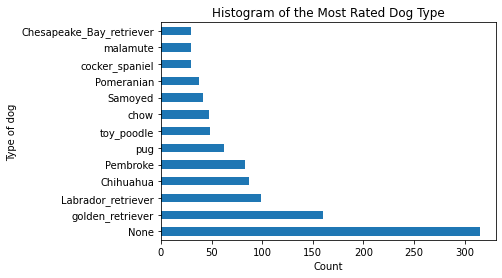

In [94]:
df_dog_breed = dfs.groupby('dog_breed').filter(lambda x: len(x) >= 30)

df_dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output1.png',bbox_inches='tight');

- ### 2nd Insight and Visualization<br>
The highest ratings do not receive the most retweets.

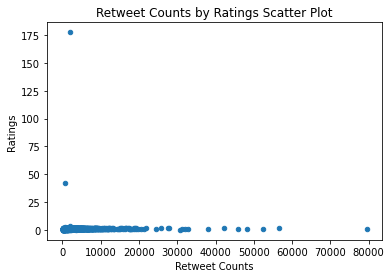

In [95]:
dfs.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output2.png',bbox_inches='tight');

- ### 3rd Insight <br>
    clumber has the lowest average rating Blenheim_spaniel has the highest average rating

In [96]:
df_dog_type_mean = dfs.groupby('dog_breed').mean()

In [97]:
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,id,retweet_count,favorite_count,rating
dog_breed,,,,,,,,,,
Afghan_hound,683984487161699328,11.250000,10.0,0.394129,0.109826,0.088657,6.839212e+17,1894.000000,5117.250000,1.125000
Airedale,766765982268004736,76.400000,10.0,0.579603,0.127392,0.079215,7.639720e+17,4025.833333,14261.666667,7.640000
American_Staffordshire_terrier,732470463099892352,11.428571,10.0,0.649153,0.160578,0.054067,7.192877e+17,3346.454545,9291.181818,1.142857
Appenzeller,717161270888308736,9.000000,10.0,0.503665,0.152041,0.130708,7.171128e+17,2682.500000,5946.000000,0.900000
Australian_terrier,720599244390948864,10.000000,10.0,0.307584,0.242234,0.115970,7.204055e+17,1897.500000,6276.000000,1.000000


In [98]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_breed
clumber                 0.400000
silky_terrier           0.800000
Rhodesian_ridgeback     0.850000
Bedlington_terrier      0.900000
Appenzeller             0.900000
                         ...    
standard_schnauzer      1.300000
Airedale                7.640000
Brabancon_griffon      14.733333
Blenheim_spaniel       17.054545
Gordon_setter                inf
Name: rating, Length: 112, dtype: float64

- ### 4th Insight and Visualization<br>
    The most three common names are Charlie, Lucy and Cooper.       
       
 

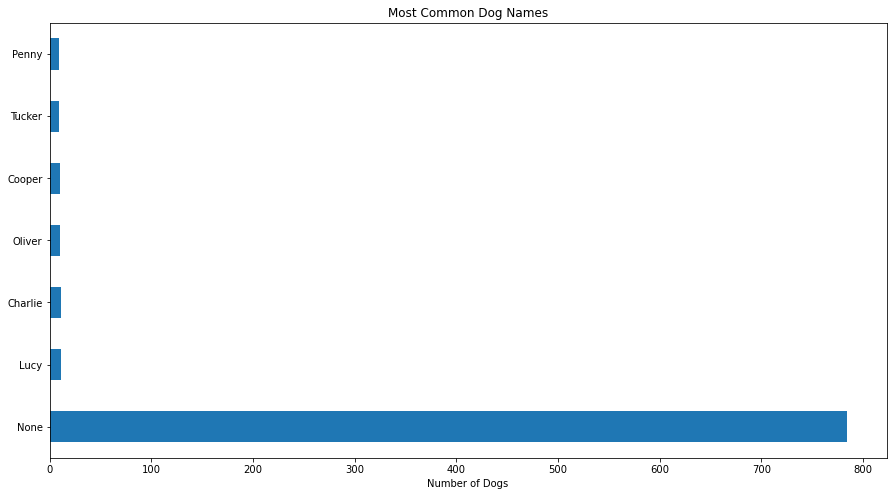

In [99]:
dfs.name.value_counts()[0:7].plot(kind ='barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");
fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

In [100]:
dfs.name.value_counts()

None         784
Lucy          11
Charlie       11
Oliver        10
Cooper        10
            ... 
Bilbo          1
Shnuggles      1
Sunshine       1
Jarvis         1
Ike            1
Name: name, Length: 931, dtype: int64